In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [4]:
heart=pd.read_csv('heart.csv')
print(heart.shape)
heart.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# unique values of each column
for column in heart:
    unique_vals = np.unique(heart[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature age :41
The number of values for feature sex :2 -- [0 1]
The number of values for feature cp :4 -- [0 1 2 3]
The number of values for feature trestbps :49
The number of values for feature chol :152
The number of values for feature fbs :2 -- [0 1]
The number of values for feature restecg :3 -- [0 1 2]
The number of values for feature thalach :91
The number of values for feature exang :2 -- [0 1]
The number of values for feature oldpeak :40
The number of values for feature slope :3 -- [0 1 2]
The number of values for feature ca :5 -- [0 1 2 3 4]
The number of values for feature thal :4 -- [0 1 2 3]
The number of values for feature target :2 -- [0 1]


In [6]:
num_column = heart[['age','trestbps', 'chol', 'thalach', 'oldpeak']]
# num_column
num_column.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Preprocessing

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

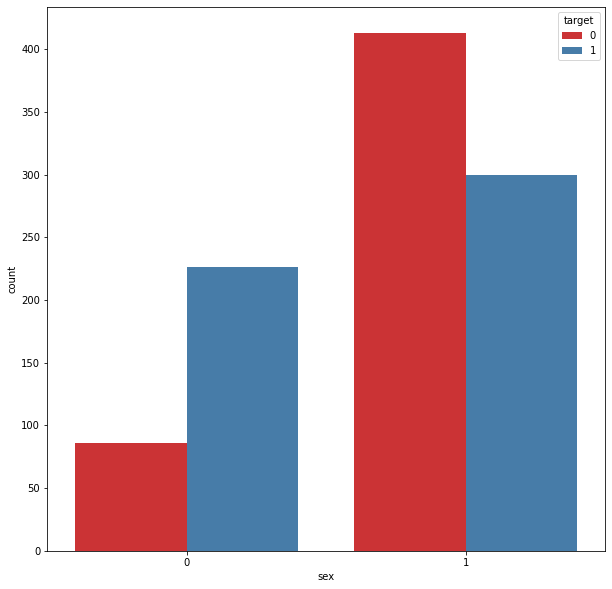

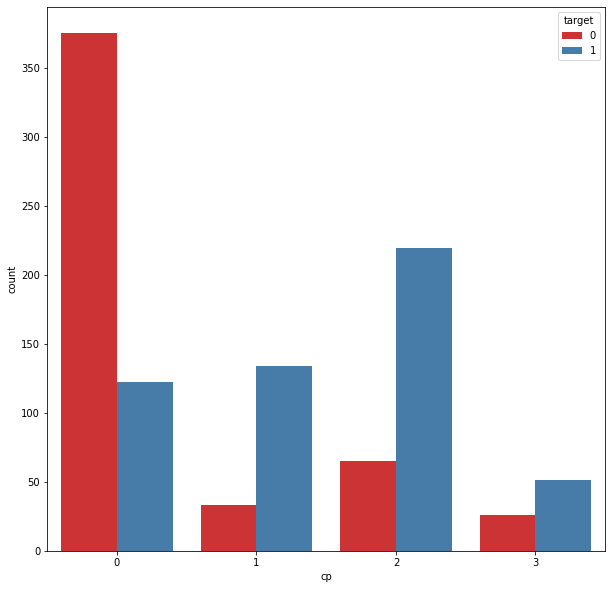

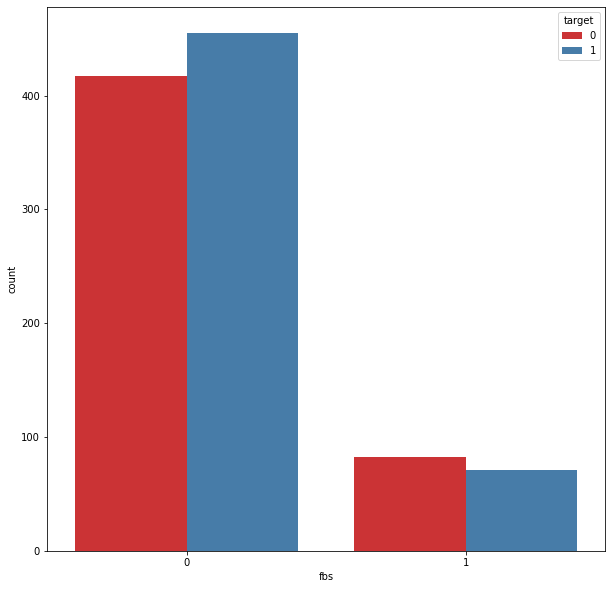

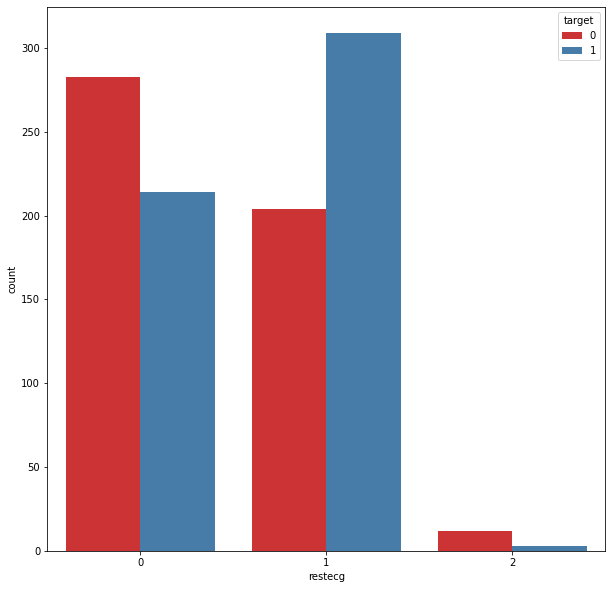

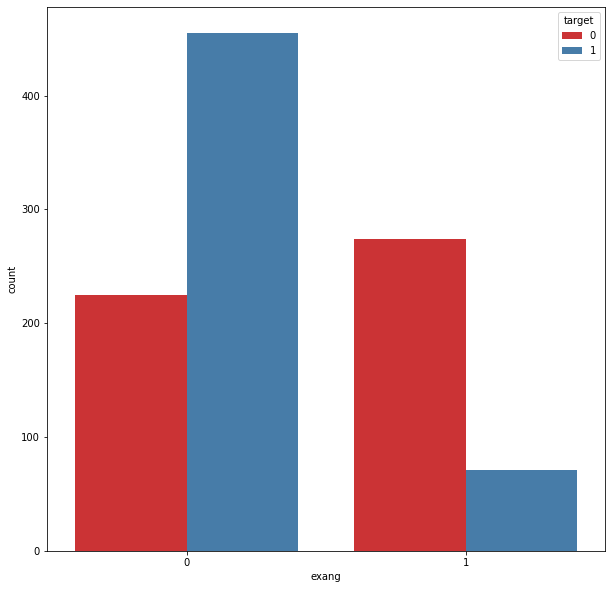

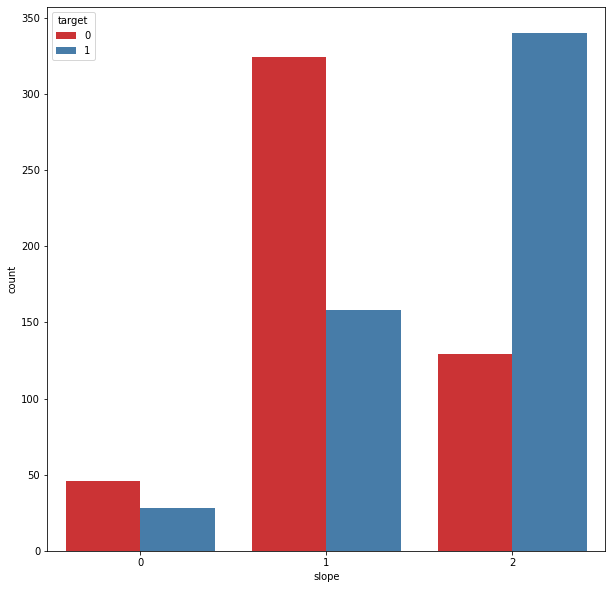

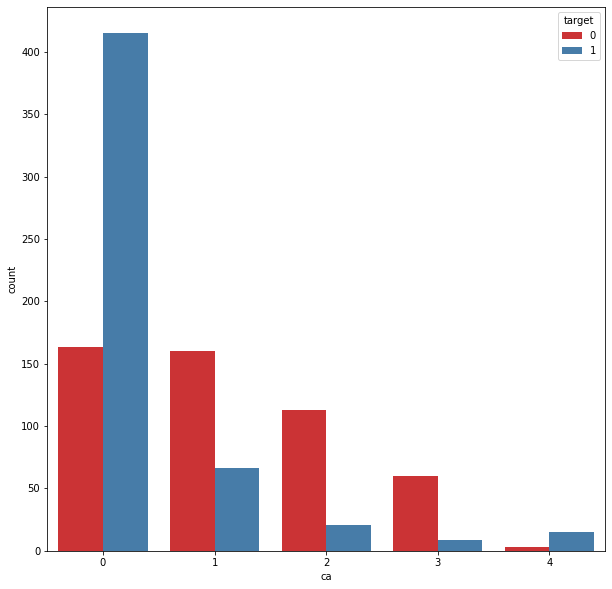

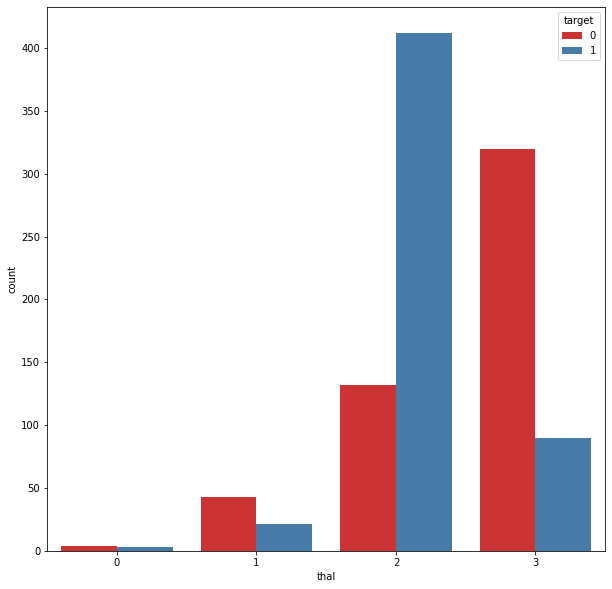

In [11]:
cat_column = heart[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]

for f in cat_column:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(x=f, data=heart, hue = 'target', palette="Set1")

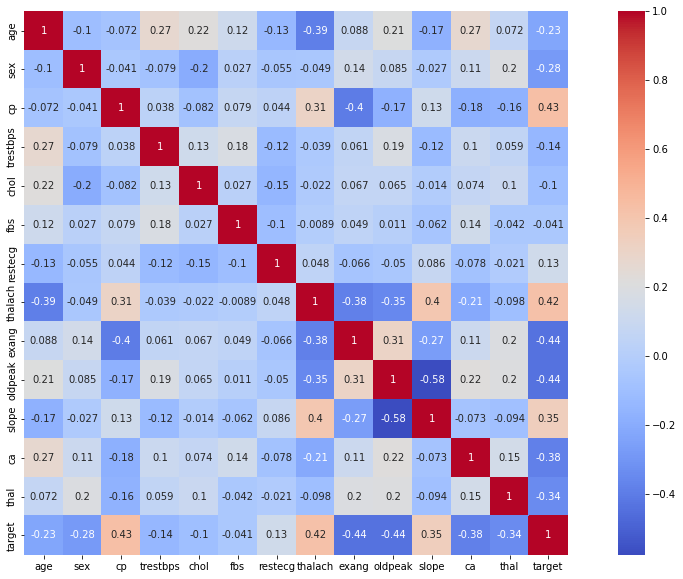

In [12]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (18,10))
sns.heatmap(heart.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [13]:
independent_var = heart.drop('target', axis=1)
dependent_var = heart['target']

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(independent_var)

#showing data
print('independent_var \n' , X[:10])
print('dependent_var \n' , dependent_var[:10])

independent_var 
 [[0.47916667 1.         0.         0.29245283 0.19634703 0.
  0.5        0.74045802 0.         0.16129032 1.         0.5
  1.        ]
 [0.5        1.         0.         0.43396226 0.17579909 1.
  0.         0.64122137 1.         0.5        0.         0.
  1.        ]
 [0.85416667 1.         0.         0.48113208 0.10958904 0.
  0.5        0.41221374 1.         0.41935484 0.         0.
  1.        ]
 [0.66666667 1.         0.         0.50943396 0.17579909 0.
  0.5        0.6870229  0.         0.         1.         0.25
  1.        ]
 [0.6875     0.         0.         0.41509434 0.38356164 1.
  0.5        0.26717557 0.         0.30645161 0.5        0.75
  0.66666667]
 [0.60416667 0.         0.         0.05660377 0.27853881 0.
  0.         0.38931298 0.         0.16129032 0.5        0.
  0.66666667]
 [0.60416667 1.         0.         0.18867925 0.43835616 0.
  1.         0.52671756 0.         0.70967742 0.         0.75
  0.33333333]
 [0.54166667 1.         0.         0.

## Splitting into Training dataset and Testing dataset

In [16]:
from sklearn.model_selection import train_test_split

In [34]:
# Split dataset into X and y
X = independent_var# Input features (attributes)
y = dependent_var # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# training dataset = 70% and testing dataset = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train shape : {}'.format(np.shape(X_train)))
print('X_test shape : {}'.format(np.shape(X_test)))

X shape: (1025, 13)
y shape: (1025,)
X_train shape : (717, 13)
X_test shape : (308, 13)


# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) 
#criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)
rf_predict = RandomForestClassifierModel.predict(X=X_train)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [38]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  0.9581589958158996
Testing Accuracy is:  0.9512987012987013
Confusion Matrix for Testing: 
 [[331  23]
 [  7 356]]


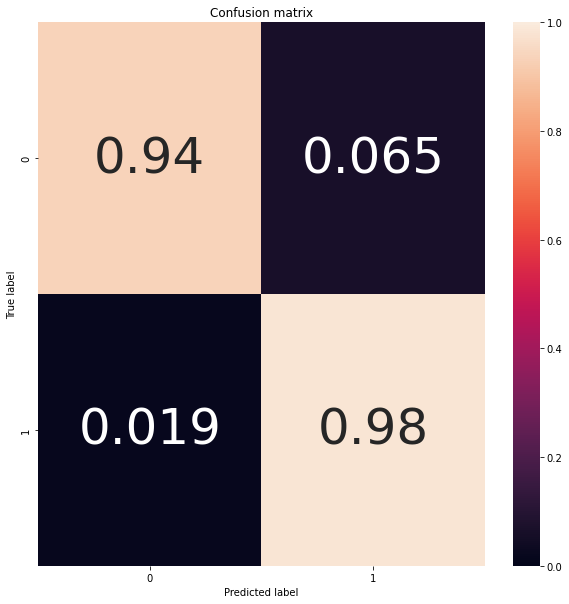

In [39]:
# Accuracy on Test
print("Training Accuracy is: ", RandomForestClassifierModel.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", RandomForestClassifierModel.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_train, rf_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_norm, classes=RandomForestClassifierModel.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

In [40]:
#del final_fi

# Calculating FI
for i, column in enumerate(independent_var):
    print('Importance of feature {}:, {:.3f}'.format(column, RandomForestClassifierModel.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [RandomForestClassifierModel.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature age:, 0.066
Importance of feature sex:, 0.033
Importance of feature cp:, 0.162
Importance of feature trestbps:, 0.050
Importance of feature chol:, 0.053
Importance of feature fbs:, 0.004
Importance of feature restecg:, 0.010
Importance of feature thalach:, 0.095
Importance of feature exang:, 0.077
Importance of feature oldpeak:, 0.122
Importance of feature slope:, 0.046
Importance of feature ca:, 0.144
Importance of feature thal:, 0.137


,level_0,index,Variable,Feature Importance Score
0,15,NaN,cp,0.162215
1,0,11.0,ca,0.149522
2,1,2.0,cp,0.145777
3,24,NaN,ca,0.143509
4,2,12.0,thal,0.139555
5,25,NaN,thal,0.137327
6,3,9.0,oldpeak,0.123504
7,22,NaN,oldpeak,0.121961
8,4,7.0,thalach,0.100332
9,20,NaN,thalach,0.095404


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
decision_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
decision_model.fit(X_train, y_train)
dt_predict = decision_model.predict(X_train)

Training Accuracy is:  0.9191073919107392
Testing Accuracy is:  0.8961038961038961
Confusion Matrix for Testing: 
 [[330  24]
 [ 34 329]]


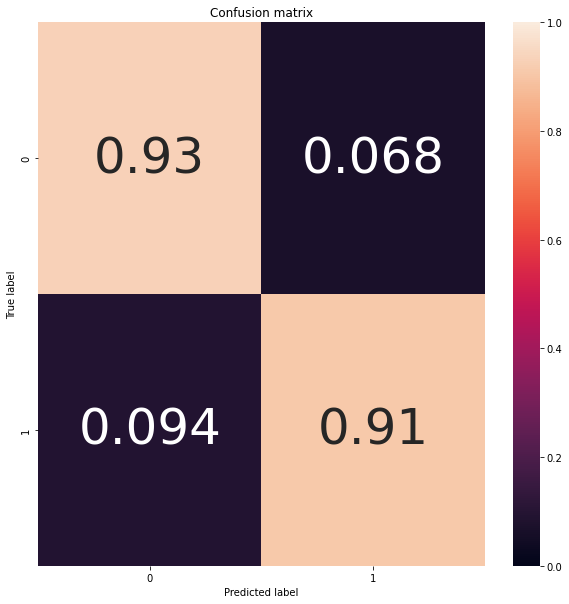

In [43]:
# Accuracy on Test
print("Training Accuracy is: ", decision_model.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", decision_model.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_train, dt_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_norm, classes=decision_model.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

#Create a Gaussian Classifier
knn_model = KNeighborsClassifier()

# Train the model using the training sets
knn_model.fit(X_train, y_train)

#Predict the response for test dataset
knn_predict = knn_model.predict(X_train)

Training Accuracy is:  0.8772663877266388
Testing Accuracy is:  0.7435064935064936
Confusion Matrix for Testing: 
 [[321  33]
 [ 55 308]]


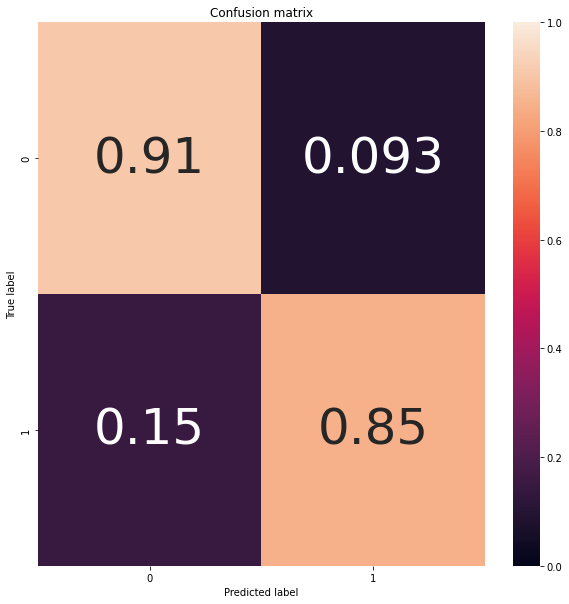

In [45]:
# Accuracy on Test
print("Training Accuracy is: ", knn_model.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", knn_model.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_train, knn_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_norm, classes=knn_model.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
naive_model = GaussianNB()

# Train the model using the training sets
naive_model.fit(X_train, y_train)

#Predict the response for test dataset
nb_predict = naive_model.predict(X_train)

Training Accuracy is:  0.8158995815899581
Testing Accuracy is:  0.8441558441558441
Confusion Matrix for Testing: 
 [[277  77]
 [ 55 308]]


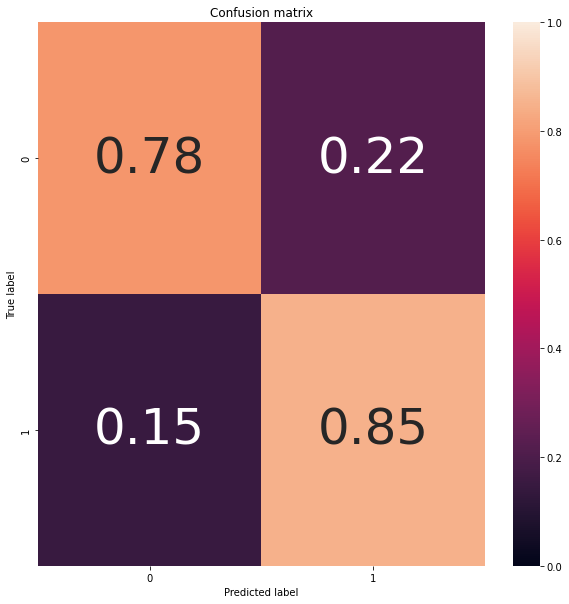

In [47]:
# Accuracy on Test
print("Training Accuracy is: ", naive_model.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", naive_model.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_train, nb_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_norm, classes=naive_model.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

# Compute R^2 score for all models

In [49]:
rf_R2 = r2_score(y_train, rf_predict)
knn_R2 = r2_score(y_train, knn_predict)
nb_R2 = r2_score(y_train, nb_predict)
dt_R2 = r2_score(y_train, dt_predict)

print('R2 - score for Random Forest model is : ', rf_R2)
print('R2 - score for KNeighbour Nearest model is : ', knn_R2)
print('R2 - score for Naive Bayes model is : ', nb_R2)
print('R2 - score for Decision Tree model is : ', dt_R2)

R2 - score for Random Forest model is :  0.8326096091889621
R2 - score for KNeighbour Nearest model is :  0.5089881869542887
R2 - score for Naive Bayes model is :  0.26348228043143296
R2 - score for Decision Tree model is :  0.6763785777653266


In [50]:
models = ['Random Forest', 'KNeighbour Nearest', 'Naive Bayes', 'Decison Tree']
n = [rf_R2, knn_R2, nb_R2, dt_R2]
y_pos = np.arange(len(models))
highlights = ['red' if (x < max(n)) else 'green' for x in n]

<BarContainer object of 4 artists>

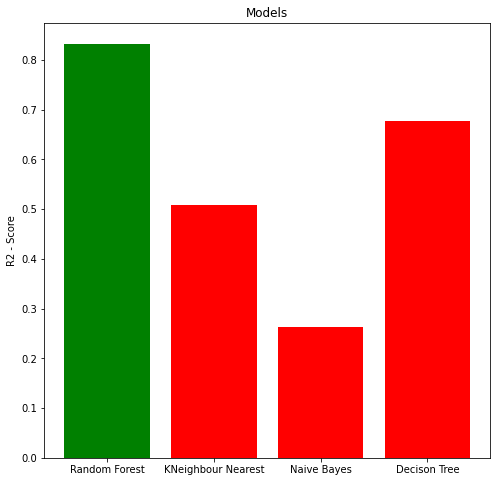

In [51]:
plt.figure(figsize=(8,8))
plt.xticks(y_pos, models)
plt.ylabel('R2 - Score')
plt.title('Models')
plt.bar(y_pos, n, color=highlights)

In [52]:
input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = RandomForestClassifierModel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person does not have a Heart Disease')
else:
  print('The person has Heart Disease')

[0]
The person does not have a Heart Disease


In [53]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = RandomForestClassifierModel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person does not have a Heart Disease')
else:
  print('The person has Heart Disease')

[1]
The person has Heart Disease
